In [7]:
pip install arch

   ---------------------------------------- 0.0/926.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/926.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/926.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/926.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/926.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/926.2 kB ? eta -:--:--
   ----------- ---------------------------- 262.1/926.2 kB ? eta -:--:--
   --------------------- ---------------- 524.3/926.2 kB 929.6 kB/s eta 0:00:01
   --------------------------------- ------ 786.4/926.2 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 926.2/926.2 kB 1.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [275]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import warnings

from arch.univariate.base import DataScaleWarning
from arch.utility.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)
import itertools
import math

In [283]:
tickers=[
    "RELIANCE.NS", "TCS.NS", "INFY.NS", "HDFCBANK.NS", "ICICIBANK.NS", "HINDUNILVR.NS",
    "ITC.NS", "KOTAKBANK.NS", "LT.NS", "SBIN.NS", "AXISBANK.NS", "BAJFINANCE.NS",
    "BHARTIARTL.NS", "ASIANPAINT.NS", "HCLTECH.NS", "MARUTI.NS", "SUNPHARMA.NS", "TITAN.NS",
    "ULTRACEMCO.NS", "WIPRO.NS", "TECHM.NS", "NESTLEIND.NS", "POWERGRID.NS", "NTPC.NS",
    "JSWSTEEL.NS", "TATASTEEL.NS", "BAJAJFINSV.NS", "ADANIENT.NS", "ADANIPORTS.NS", "HINDALCO.NS",
    "ONGC.NS", "COALINDIA.NS", "EICHERMOT.NS", "HDFCLIFE.NS", "SBILIFE.NS", "BRITANNIA.NS",
    "DIVISLAB.NS", "CIPLA.NS", "GRASIM.NS", "BPCL.NS", "IOC.NS", "HEROMOTOCO.NS",
    "BAJAJ-AUTO.NS", "SHREECEM.NS", "DRREDDY.NS", "M&M.NS", "INDUSINDBK.NS", "APOLLOHOSP.NS"
]

In [284]:
from arch import arch_model
from tqdm import tqdm  #progress bar

In [285]:
avg_forecasted_vol=[]

start_date='2022-03-01'
end_date='2024-05-31'

data=yf.download(tickers,start=start_date,end=end_date,interval="1d")
returns=data["Close"].pct_change().dropna()
returns=returns*100

[*********************100%***********************]  48 of 48 completed


In [286]:
returns

Ticker,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,...,SBILIFE.NS,SBIN.NS,SHREECEM.NS,SUNPHARMA.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2022-03-03,0.121818,-0.506816,1.163282,-5.184960,-1.679440,-2.229932,-2.173422,-1.217881,-0.326291,1.256945,...,-3.554383,-1.444380,-4.619639,0.000000,1.081940,-0.049365,2.316511,-0.709697,-6.542069,2.584652
2022-03-04,-1.752037,-0.926847,-3.468015,-4.657194,-3.070574,-1.668133,-2.361805,-3.118552,-2.730445,0.562922,...,-2.214932,-1.166016,-1.212158,1.065912,-2.010285,-0.565652,1.889030,-5.176263,1.163741,1.009567
2022-03-07,-3.154802,-3.192192,-1.746266,-1.084679,-6.636353,-0.229791,-6.260932,-6.315476,3.319570,-2.971136,...,-2.690696,-4.686662,-2.483331,-0.843722,1.158877,-1.119391,-2.029433,-2.101598,-5.821195,-0.599690
2022-03-08,2.400815,1.630284,1.241312,0.551973,0.426941,2.548973,0.539199,0.601629,1.125266,1.065064,...,0.296433,0.000000,2.698921,3.932402,-1.733881,3.301392,2.657818,-0.772060,2.375359,2.727991
2022-03-09,3.430949,3.665527,-0.239279,5.564742,0.566814,0.660208,3.906383,5.041512,1.244509,0.307392,...,-0.654103,2.589144,-2.741786,1.549701,-1.114603,0.906968,2.927587,2.631516,3.152508,-0.331956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-24,-0.069378,-1.887968,-0.932985,-0.998702,0.750906,-0.170133,-0.419657,0.150148,1.051641,1.027100,...,-0.729200,-0.420621,-0.858559,-0.561838,-0.370366,-1.128812,-1.177574,-1.148593,0.595352,-0.461571
2024-05-27,-2.833126,1.098093,0.421854,-0.085213,1.107325,0.564357,-0.368345,0.857114,-0.298892,0.298129,...,-1.813758,0.615499,-0.162044,-1.388975,0.371743,-0.063647,0.601471,-0.263747,-0.054738,-2.415612
2024-05-28,-1.368180,-2.175816,-0.585923,1.354304,-0.303283,-0.099456,0.241259,-0.325580,-0.960735,-1.455695,...,2.875483,-0.305859,0.863458,-0.078441,-0.341884,-0.185854,-1.097983,0.176299,-0.455711,0.795667


EGARCH MODEL

In [287]:
avg_forecasted_vol_list=[]
for ticker in tqdm(tickers):
    window_size = 90
    forecast_horizon = 1  #one day ahead
    rolling_volatility = []
    dates = []
    
    for i in range(window_size, len(returns)):
        train_data = returns[ticker].iloc[i-window_size:i]   
        
        if train_data.isna().any() or train_data.std() < 1e-6:
            continue  # skip bad segments
    
        model = arch_model(train_data, vol='EGARCH', p=1, q=1, o=1, dist='t')
        
        try:
            result = model.fit(disp='off', options={"maxiter": 5000})
            forecast = result.forecast(horizon=forecast_horizon)
            var = forecast.variance.values[-1, 0]
            
            if not np.isnan(var) and var < 10000:
                vol = np.sqrt(var) /100   # divide because train_data was scaled
                rolling_volatility.append(vol)
                dates.append(returns.index[i])
        except Exception as e:
            continue
    
    vol_forecast = pd.Series(rolling_volatility, index=dates)
    avg_forecasted_vol=np.mean(rolling_volatility)
    avg_forecasted_vol_list.append(avg_forecasted_vol)
    print("avg_forecasted_vol of "+str(ticker)+" = "+str(avg_forecasted_vol))
    
avg_forecasted_vol_df=pd.DataFrame(avg_forecasted_vol_list,index=tickers)



  0%|                                                                                           | 0/48 [00:00<?, ?it/s]C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\a

avg_forecasted_vol of RELIANCE.NS = 0.04563413281005612


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4.

avg_forecasted_vol of TCS.NS = 0.023511770523206695


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 9.

avg_forecasted_vol of INFY.NS = 0.03917671608791116


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer retu

avg_forecasted_vol of HDFCBANK.NS = 0.04418618672023231


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer retu

avg_forecasted_vol of ICICIBANK.NS = 0.04151899513673601


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer retu

avg_forecasted_vol of HINDUNILVR.NS = 0.03331014101660651


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer retu

avg_forecasted_vol of ITC.NS = 0.03788316572811401


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer retu

avg_forecasted_vol of KOTAKBANK.NS = 0.05238455027890998


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4.

avg_forecasted_vol of LT.NS = 0.04930157185430212


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer retu

avg_forecasted_vol of SBIN.NS = 0.039453834305716404


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer retu

avg_forecasted_vol of AXISBANK.NS = 0.03385976225966166


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.


 25%|███████████████████▊                                                           | 12/48 [29:41<1:22:12, 137.01s/it]

avg_forecasted_vol of BAJFINANCE.NS = 0.05203543910467979


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer retu

avg_forecasted_vol of BHARTIARTL.NS = 0.04085112114332728


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4.

avg_forecasted_vol of ASIANPAINT.NS = 0.02941777190525695


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer retu

avg_forecasted_vol of HCLTECH.NS = 0.04186008830184685


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer retu

avg_forecasted_vol of MARUTI.NS = 0.03997708682881654


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


 35%|███████████████████████████▉                                                   | 17/48 [48:54<1:58:57, 230.25s/it]

avg_forecasted_vol of SUNPHARMA.NS = 0.0215152383361217


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message

avg_forecasted_vol of TITAN.NS = 0.0321807122046466


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer retu

avg_forecasted_vol of ULTRACEMCO.NS = 0.04633503686037793


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer retu

avg_forecasted_vol of WIPRO.NS = 0.054237383994198536


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequal

avg_forecasted_vol of TECHM.NS = 0.03265735457956196


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer retu

avg_forecasted_vol of NESTLEIND.NS = 0.02789077465279864


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4.

avg_forecasted_vol of POWERGRID.NS = 0.056351021337054975


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer retu

avg_forecasted_vol of NTPC.NS = 0.063658700785107


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4.

avg_forecasted_vol of JSWSTEEL.NS = 0.056103576304997835


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer retu

avg_forecasted_vol of TATASTEEL.NS = 0.04830291770947767


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer retu

avg_forecasted_vol of BAJAJFINSV.NS = 0.04755179281675636


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4.

avg_forecasted_vol of ADANIENT.NS = 0.07897425369749579


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


 60%|███████████████████████████████████████████████▋                               | 29/48 [1:15:38<36:25, 115.04s/it]

avg_forecasted_vol of ADANIPORTS.NS = 0.04017433925148208


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message

avg_forecasted_vol of HINDALCO.NS = 0.04860475666347398


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4.

avg_forecasted_vol of ONGC.NS = 0.04059995312167444


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4.

avg_forecasted_vol of COALINDIA.NS = 0.0530286000112027


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4.

avg_forecasted_vol of EICHERMOT.NS = 0.05276225050619716


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4.

avg_forecasted_vol of HDFCLIFE.NS = 0.0401575162501573


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer retu

avg_forecasted_vol of SBILIFE.NS = 0.03472326795117592


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4.

avg_forecasted_vol of BRITANNIA.NS = 0.03931186978839974


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer retu

avg_forecasted_vol of DIVISLAB.NS = 0.039073321067492936


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer retu

avg_forecasted_vol of CIPLA.NS = 0.04797238386982902


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer retu

avg_forecasted_vol of GRASIM.NS = 0.03085083056214176


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer retu

avg_forecasted_vol of BPCL.NS = 0.053820947345857365


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4.

avg_forecasted_vol of IOC.NS = 0.05384841207678417


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4.

avg_forecasted_vol of HEROMOTOCO.NS = 0.03122568202494723


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer retu

avg_forecasted_vol of BAJAJ-AUTO.NS = 0.04635982970530434


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constrai

avg_forecasted_vol of SHREECEM.NS = 0.03432361599281851


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer retu

avg_forecasted_vol of DRREDDY.NS = 0.031515779521853235


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message

avg_forecasted_vol of M&M.NS = 0.045724590305596426


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer retu

avg_forecasted_vol of INDUSINDBK.NS = 0.03671386433958552


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning:

The optimizer retu

avg_forecasted_vol of APOLLOHOSP.NS = 0.03077014888158425


In [288]:
avg_forecasted_vol_df=avg_forecasted_vol_df.sort_index()
avg_forecasted_vol_df

,0
ADANIENT.NS,0.078974
ADANIPORTS.NS,0.040174
APOLLOHOSP.NS,0.030770
ASIANPAINT.NS,0.029418
AXISBANK.NS,0.033860
BAJAJ-AUTO.NS,0.046360
BAJAJFINSV.NS,0.047552
BAJFINANCE.NS,0.052035
BHARTIARTL.NS,0.040851
BPCL.NS,0.053821


EXPECTED RETURNS

In [364]:
closing_data=yf.download(tickers,start=start_date,end=end_date,interval="1d")
closing_data=closing_data["Close"]
log_returns=np.log(closing_data/closing_data.shift(1))
expected_returns=log_returns.mean()
expected_returns_df=pd.DataFrame(expected_returns,columns=["expected returns"],index=tickers)
expected_returns

[*********************100%***********************]  48 of 48 completed


Ticker
ADANIENT.NS      0.001207
ADANIPORTS.NS    0.001232
APOLLOHOSP.NS    0.000322
ASIANPAINT.NS   -0.000061
AXISBANK.NS      0.000806
BAJAJ-AUTO.NS    0.001893
BAJAJFINSV.NS   -0.000092
BAJFINANCE.NS   -0.000044
BHARTIARTL.NS    0.001310
BPCL.NS          0.001229
BRITANNIA.NS     0.000835
CIPLA.NS         0.000862
COALINDIA.NS     0.002053
DIVISLAB.NS      0.000135
DRREDDY.NS       0.000790
EICHERMOT.NS     0.001186
GRASIM.NS        0.000775
HCLTECH.NS       0.000507
HDFCBANK.NS      0.000243
HDFCLIFE.NS     -0.000022
HEROMOTOCO.NS    0.001478
HINDALCO.NS      0.000295
HINDUNILVR.NS    0.000219
ICICIBANK.NS     0.000829
INDUSINDBK.NS    0.000882
INFY.NS         -0.000233
IOC.NS           0.001606
ITC.NS           0.001351
JSWSTEEL.NS      0.000634
KOTAKBANK.NS    -0.000118
LT.NS            0.001328
M&M.NS           0.002147
MARUTI.NS        0.000894
NESTLEIND.NS     0.000585
NTPC.NS          0.001972
ONGC.NS          0.001156
POWERGRID.NS     0.001402
RELIANCE.NS      0.000470
SBILI

CALCULATING SCORE

In [452]:
scores=[]
r=0.5 #Risk Aversion Coefficient
i=0
while i<len(expected_returns):
    score=((1-r)*expected_returns.iloc[i])-(r*avg_forecasted_vol_df.iloc[i])
    scores.append(score)
    i+=1
score_df=pd.DataFrame(scores,index=expected_returns.index)
score_df.columns=["Score"]
#sorting the score_df according to the max score and showing the top 2 stocks
score_df.sort_values('Score', inplace=True,ascending=False)
score_df.head(2)

,Score
Ticker,
SUNPHARMA.NS,-0.010219
TCS.NS,-0.011676


In [453]:
stock_1=score_df.index[0]
stock_2=score_df.index[1]

So we have got our two stocks
Now, we will apply EMA based buy/sell bands strategy on them 

In [458]:
print(stock_2)

TCS.NS


In [459]:
stock_1_df=yf.download(stock_1,start="2024-06-01",end="2025-06-01",interval="1d",multi_level_index=False)
stock_2_df=yf.download(stock_2,start="2024-06-01",end="2025-06-01",interval="1d",multi_level_index=False)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [460]:
capital=100000

In [478]:
def df_update(df):
    df.reset_index(inplace=True)
    df.columns = df.columns.get_level_values(0)
    
    
    df["EMA_14"]=df["Close"].ewm(span=14,adjust=False).mean()
    df["buy_band"]=df["EMA_14"]+df["High"]-df["Low"]
    df["sell_band"]=df["EMA_14"]-df["High"]+df["Low"]
    
df_update(stock_1_df)
df_update(stock_2_df)

In [462]:
stock_1_df

,Date,Close,High,Low,Open,Volume,EMA_14,buy_band,sell_band
0,2024-06-03,1435.055786,1479.449087,1433.031125,1477.967662,1855318,1435.055786,1481.473748,1388.637824
1,2024-06-04,1412.143066,1458.017913,1360.145047,1443.499882,5055952,1432.000757,1529.873623,1334.127890
2,2024-06-05,1468.881592,1471.548107,1414.266369,1431.747127,2487724,1436.918201,1494.199940,1379.636463
3,2024-06-06,1454.462402,1475.498677,1437.031072,1475.498677,3004955,1439.257428,1477.725033,1400.789824
4,2024-06-07,1488.189453,1491.399206,1453.919219,1461.573245,3404664,1445.781698,1483.261685,1408.301712
...,...,...,...,...,...,...,...,...,...
242,2025-05-26,1670.600586,1696.814343,1661.530468,1687.544808,2282131,1717.157475,1752.441350,1681.873600
243,2025-05-27,1677.876709,1686.448468,1655.649828,1670.600612,2800622,1711.920039,1742.718679,1681.121399
244,2025-05-28,1660.932495,1681.365234,1657.543626,1677.876717,2657712,1705.121700,1728.943308,1681.300093
245,2025-05-29,1694.222900,1697.711417,1664.919339,1669.504222,2377583,1703.668527,1736.460604,1670.876449


In [463]:
def strategy(df):
    signal=[0]
    for i in range(1,len(df)):
        if df.loc[i,"Close"]>df.loc[i,"buy_band"] and df.loc[i-1,"Close"]<=df.loc[i-1,"buy_band"]:
            signal.append(1)
        elif df.loc[i,"Close"]<df.loc[i,"sell_band"] and df.loc[i-1,"Close"]>=df.loc[i-1,"sell_band"]:
            signal.append(-1)
        else:
            signal.append(0)
    df["Signal"]=signal



strategy(stock_1_df)
strategy(stock_2_df)

In [464]:
def backtesting(df,signal,initial_capital):
    trade_idx=[]
    opening_trade_idx=[]
    closing_trade_idx=[]
    entry_date=[]
    exit_date=[]
    pos=[]
    type_of_trade=[]

    prev_pos=0
    current_signal=0
    for i in range(len(df)):
        if df.loc[i,signal]==1 or df.loc[i,signal]==-1:
            trade_idx.append(i)
        
        current_signal=df.loc[i,signal]
        
        if current_signal==1:
            if prev_pos==0:
                pos.append(1)
                opening_trade_idx.append(i)
                type_of_trade.append("long")
                entry_date.append(df.loc[i,"Date"])
            elif prev_pos==1:
                pos.append(1)
            elif prev_pos==-1:
                pos.append(0)
                closing_trade_idx.append(i)
                exit_date.append(df.loc[i,"Date"])
        elif current_signal==-1:
            if prev_pos==0:
                pos.append(-1)
                opening_trade_idx.append(i)
                type_of_trade.append("short")
                entry_date.append(df.loc[i,"Date"])
            elif prev_pos==1:
                pos.append(0)
                closing_trade_idx.append(i)
                exit_date.append(df.loc[i,"Date"])
            elif prev_pos==-1:
                pos.append(-1)
        else:
            pos.append(prev_pos)

        prev_pos=pos[i]

    #squaring off all positions at the end
    if pos[len(df)-1]==1:
        pos[len(df)-1]=0
        df.loc[len(df)-1,signal]=-1
        closing_trade_idx.append(len(df)-1)
        exit_date.append(df.loc[len(df)-1,"Date"])
    elif pos[len(df)-1]==-1:
        pos[len(df)-1]=0
        df.loc[len(df)-1,signal]=1
        closing_trade_idx.append(len(df)-1)
        exit_date.append(df.loc[len(df)-1,"Date"])
        
    

    no_of_shares=[]
    capital=initial_capital
    portfolio=[]
    shares=0

    for i in range(len(df)):
        price=df.loc[i,"Close"]
        #long trade
        if df.loc[i,signal]==1 and pos[i-1]==0 and capital>price :
            shares=int(capital/price)
            capital-=shares*price
            #trades_idx_1.append(i)
            #type_of_trade1.append("long")
        elif df.loc[i,signal]==-1 and pos[i-1]==1 and shares>0:
            capital+=shares*price
            shares=0
            #trades_idx_1.append(i)
            #type_of_trade1.append("long close")
        #short trade    
        elif df.loc[i,signal]==-1 and pos[i-1]==0 and capital>price:
            shares=-int(capital/price)
            capital-=shares*price
            #trades_idx_1.append(i)
            #type_of_trade1.append("short")
        elif df.loc[i,signal]==1 and pos[i-1]==-1 and shares<0:
            capital+=shares*price
            shares=0
            #trades_idx_1.append(i)
            #type_of_trade1.append("short close")
        portfolio_value=shares*price+capital
        portfolio.append(portfolio_value)
        no_of_shares.append(shares)

    #print((opening_trade_idx))
    #print((closing_trade_idx))
    #print(len(type_of_trade))
    #print(pos)
    #print(type_of_trade)
    #print(df.loc[len(df)-1,signal])
    
    
    returns=[]
    for i in range(len(opening_trade_idx)):
        if type_of_trade[i]=="long":
            returns.append((df.loc[closing_trade_idx[i],"Close"]-df.loc[opening_trade_idx[i],"Close"])*100/df.loc[opening_trade_idx[i],"Close"])
        else:
            returns.append(-(df.loc[closing_trade_idx[i],"Close"]-df.loc[opening_trade_idx[i],"Close"])*100/df.loc[opening_trade_idx[i],"Close"])
        
        
    
    trade_wise_df=pd.DataFrame({"Entry Index": opening_trade_idx,"Exit Index":closing_trade_idx,"Entry Date":entry_date,"Exit Date":exit_date,"Type of Trade":type_of_trade})
    trade_wise_df["No of stock traded"]=[no_of_shares[i]-no_of_shares[i-1] for i in opening_trade_idx]
    trade_wise_df["Return for trade in %"]=returns
    trade_wise_df["Trade Duration"]=trade_wise_df["Exit Index"]-trade_wise_df["Entry Index"]
    #np.where(df_1["Type of trade"]=='long',(returns,-returns)
    
    daily_df=pd.DataFrame({"Portfolio Value":portfolio,"No. of Stock":no_of_shares})
    daily_df["Profit from initial Capital"]=(daily_df["Portfolio Value"]-initial_capital)*100/initial_capital
    daily_df["Daily Returns in %"]=(daily_df["Portfolio Value"].pct_change())*100
    return trade_wise_df,daily_df

trade_wise_stock_1,daily_stock_1=backtesting(stock_1_df,"Signal",capital/2)
trade_wise_stock_2,daily_stock_2=backtesting(stock_2_df,"Signal",capital/2)

In [465]:
def plot_buy_sell(df,trade_wise_df):
    import plotly.graph_objects as go

    fig = go.Figure()
    
    # Line plot for stock price
    fig.add_trace(go.Scatter(
        x=df["Date"],
        y=df["Close"],
        mode='lines',
        name='Close Price',
        line=dict(color='blue')
    ))
    

    long_trades = trade_wise_df[trade_wise_df["Type of Trade"] == "long"]
    short_trades = trade_wise_df[trade_wise_df["Type of Trade"] == "short"]
    
    # Long Entry: green triangle-up
    fig.add_trace(go.Scatter(
        x=df.loc[long_trades["Entry Index"], "Date"],
        y=df.loc[long_trades["Entry Index"], "Close"],
        mode='markers',
        marker=dict(symbol='triangle-up', color='green', size=12),
        name='Long Entry'
    ))
    
    # Short Entry: red triangle-down
    fig.add_trace(go.Scatter(
        x=df.loc[short_trades["Entry Index"], "Date"],
        y=df.loc[short_trades["Entry Index"], "Close"],
        mode='markers',
        marker=dict(symbol='triangle-down', color='red', size=12),
        name='Short Entry'
    ))
    
    # Long Exit: red triangle-down
    fig.add_trace(go.Scatter(
        x=df.loc[long_trades["Exit Index"], "Date"],
        y=df.loc[long_trades["Exit Index"], "Close"],
        mode='markers',
        marker=dict(symbol='triangle-down', color='red', size=10),
        name='Long Exit'
    ))
    
    # Short Exit: green triangle-up
    fig.add_trace(go.Scatter(
        x=df.loc[short_trades["Exit Index"], "Date"],
        y=df.loc[short_trades["Exit Index"], "Close"],
        mode='markers',
        marker=dict(symbol='triangle-up', color='green', size=10),
        name='Short Exit'
    ))
    
    fig.update_layout(title="Trade Entries & Exits on Stock Price")
    fig.show()

def plot_portfolio(df,daily_df):
    fig=px.line(x=df["Date"],y=daily_df["Portfolio Value"])
    fig.show()


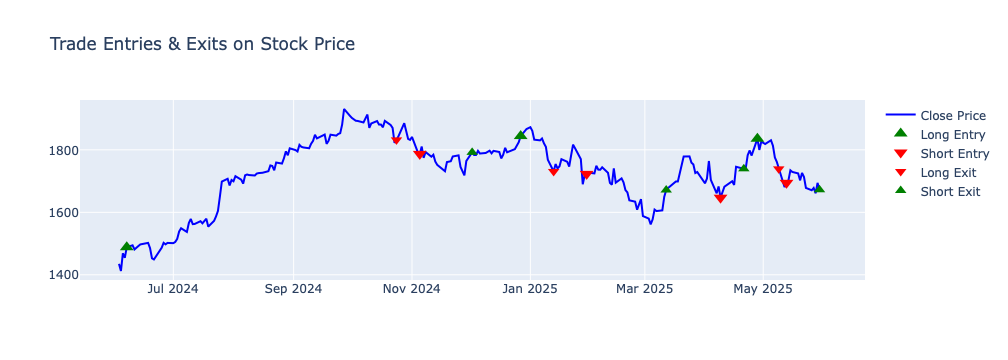

In [466]:
plot_buy_sell(stock_1_df,trade_wise_stock_1)

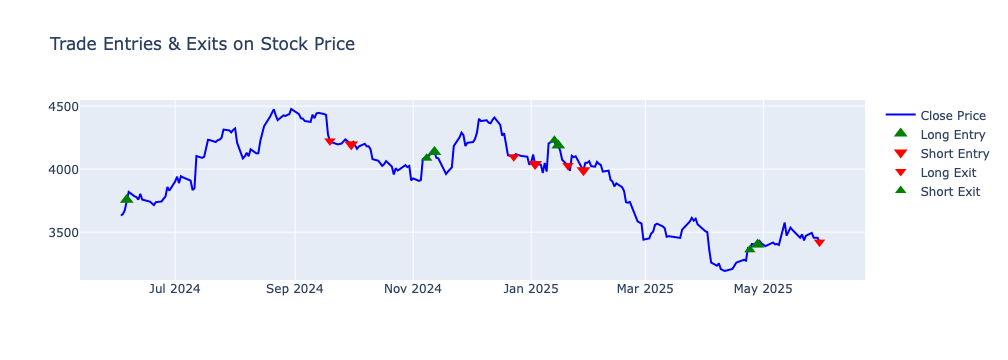

In [467]:
plot_buy_sell(stock_2_df,trade_wise_stock_2)

In [468]:
def benchmark_metrics(df,trade_wise_df,daily_df):
    benchmark_return=((df.loc[len(df)-1,"Close"]-df.loc[0,"Close"])*100)/df.loc[0,"Close"]
    gross_profit=daily_df.loc[len(daily_df)-1,"Profit from initial Capital"]

    total_trades=len(trade_wise_df)
    winning_trades= (trade_wise_df["Return for trade in %"]>0).sum()
    losing_trades=total_trades-winning_trades
    max_holding_time=trade_wise_df["Trade Duration"].max()
    avg_holding_time=trade_wise_df["Trade Duration"].mean()

    #to calculate max drawdown
    drawdown=[]
    for i in range(len(trade_wise_df)):
        entry_idx=trade_wise_df.loc[i,"Entry Index"]
        exit_idx=trade_wise_df.loc[i,"Exit Index"]
        initial_value=daily_df.loc[entry_idx,"Portfolio Value"]

        max_drawdown=0
        temp1=initial_value
        for j in range(entry_idx+1,exit_idx+1):
            temp1=max(temp1,daily_df.loc[j,"Portfolio Value"])
            drawdown_value = (temp1 - daily_df.loc[j,"Portfolio Value"]) / temp1
            max_drawdown=max(max_drawdown,drawdown_value)
        drawdown.append(max_drawdown)

    mean_return=trade_wise_df["Return for trade in %"].mean()
    std_return=trade_wise_df["Return for trade in %"].std()
    rfr=0
    sharpe=(mean_return-rfr)*np.sqrt(252)/std_return
    
    mean_return_daily=daily_df["Daily Returns in %"].mean()
    std_return_daily=daily_df["Daily Returns in %"].std()
    sharpe_daily=mean_return_daily-rfr*np.sqrt(252)/std_return_daily
    
    

    print("Benchmark Return: "+str(benchmark_return)+" %")
    print("Gross Profit: "+str(gross_profit)+" %")
    print("Max Holding Time: "+str(max_holding_time))
    print("Average Holding Time: "+str(avg_holding_time))
    print("Total Trades: "+str(total_trades))
    print("Winning Trades: "+str(winning_trades))
    print("Losing Trades: "+str(losing_trades))
    print("Max Drawdown: "+str(100*max(drawdown))+" %")
    print("Sharpe Ratio: "+str(sharpe))
    
    final_value=(1+(gross_profit/100))*capital/2
    return (final_value)

RESULTS

In [469]:
final_value_stock_1=benchmark_metrics(stock_1_df,trade_wise_stock_1,daily_stock_1)

Benchmark Return: 16.517818978380102 %
Gross Profit: 7.4043955078125 %
Max Holding Time: 95
Average Holding Time: 25.428571428571427
Total Trades: 7
Winning Trades: 3
Losing Trades: 4
Max Drawdown: 7.5300788142659325 %
Sharpe Ratio: 2.24652998459181


In [470]:
final_value_stock_2=benchmark_metrics(stock_2_df,trade_wise_stock_2,daily_stock_2)

Benchmark Return: -5.796739321947237 %
Gross Profit: 21.93989697265625 %
Max Holding Time: 72
Average Holding Time: 30.857142857142858
Total Trades: 7
Winning Trades: 4
Losing Trades: 3
Max Drawdown: 6.6248693804804955 %
Sharpe Ratio: 6.276907474309676


CALCULATING USER SCORE

In [471]:
nifty_50=yf.download(tickers,start="2024-06-01",end="2025-06-01",interval="1d")

[*********************100%***********************]  48 of 48 completed


In [472]:
nifty_50=nifty_50["Close"]

In [473]:
capital=100000
capital_per_stock=capital/48 #out of 50 -2 stocks data could not be retrieved from yfinance
capital_retained=0
for stock in nifty_50:
    shares=capital_per_stock/nifty_50.loc[nifty_50.index[0],stock]
    capital_retained+=shares*nifty_50.loc[nifty_50.index[-1],stock]

R_market=((capital_retained-capital)/capital)*100
print(f"R-Market= {R_market} %")

R-Market= 5.9069983040017835 %


In [474]:
R_user=((final_value_stock_1+final_value_stock_2)-capital)*100/capital
print(f"R-User= {R_user} %")

R-User= 14.672146240234389 %


In [475]:
user_score=R_user*100/R_market
print(f"User Score= {user_score} %")

User Score= 248.38582110806644 %
